In [12]:
#invite all of our frendz

import numpy as np
import talib as talib
import yfinance as yf
import pandas as pandas
import matplotlib
import matplotlib.pyplot as plt

In [13]:
#download our USD/SEK dataset

df = yf.download("SPY")

df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
1993-01-29,24.526087,24.543531,24.421424,24.543531,1003200
1993-02-01,24.700520,24.700520,24.543525,24.543525,480500
1993-02-02,24.752838,24.770282,24.630731,24.683063,201300
1993-02-03,25.014498,25.031942,24.770284,24.787728,529400
1993-02-04,25.119167,25.171499,24.822622,25.101723,531500
...,...,...,...,...,...
2025-01-13,581.390015,581.750000,575.349976,575.770020,47910100
2025-01-14,582.190002,585.000000,578.349976,584.359985,48420600


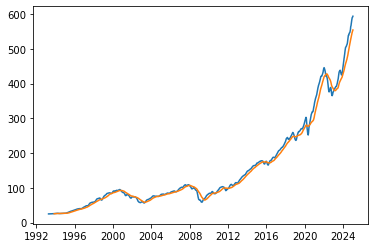

In [14]:
#calculate or simple moving averages

close_price = df['Close']
sma50 = close_price.rolling(50).mean()
sma200 = close_price.rolling(200).mean()

plt.plot(sma50) #blue
plt.plot(sma200) #orange

#bullish to bearish, and vice-versa, causes direction to change and slopes to hit. 

#maybe, for you, there's a tomorrow. there's 1,000, 3,000, 10,000; but for some of us, there's only today...

In [16]:
print("The difference between the third, and second, day of trading are as follows:", close_price.iloc[3] - close_price.iloc[2])

print(close_price.iloc[4])
print(close_price.iloc[3])


print(10.5598-10.6295)

The difference between the third, and second, day of trading are as follows: Ticker
SPY    0.26166
dtype: float64
Ticker
SPY    25.119167
Name: 1993-02-04 00:00:00, dtype: float64
Ticker
SPY    25.014498
Name: 1993-02-03 00:00:00, dtype: float64
-0.06970000000000098


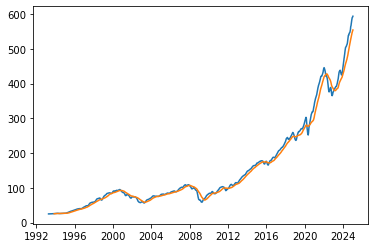

In [19]:
#begin the SMA crossover trading strategy

plt.plot(sma50)
plt.plot(sma200)

LONG on 1994-09-01 00:00:00, PnL is: 6.0325395518262
SHORT on 1998-10-01 00:00:00, PnL is: -125.67028571266184
LONG on 1998-12-04 00:00:00, PnL is: 19.79749930786136
SHORT on 2000-11-02 00:00:00, PnL is: -23.16145029842369
LONG on 2002-04-19 00:00:00, PnL is: -19.41117233456885
SHORT on 2002-05-17 00:00:00, PnL is: 1.7540778077943353
LONG on 2003-05-12 00:00:00, PnL is: -12.987884857028314
SHORT on 2004-08-25 00:00:00, PnL is: -19.37643335655369
LONG on 2004-10-27 00:00:00, PnL is: 2.0250760243865273
SHORT on 2006-07-25 00:00:00, PnL is: -16.034253809526597
LONG on 2006-08-29 00:00:00, PnL is: 3.0948522357854125
SHORT on 2007-12-28 00:00:00, PnL is: -16.03423121174471
LONG on 2009-06-18 00:00:00, PnL is: -35.427254020567084
SHORT on 2010-07-07 00:00:00, PnL is: -17.928607230154643
LONG on 2010-10-13 00:00:00, PnL is: 11.724928062238122
SHORT on 2011-08-17 00:00:00, PnL is: -2.968915558388779
LONG on 2012-01-23 00:00:00, PnL is: 11.247524354928586
SHORT on 2015-09-03 00:00:00, PnL is: -

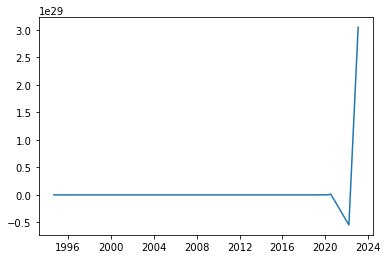

In [20]:
#loop that provides us with price data over time, and our trading signals

entry = None #remember, for the very first time, there isn't an entry price to calculate. We use "None". 
PnLs = []
dates = []
for i in range(len(close_price)):
    if i >= 50:
        if ((sma50.loc[sma50.index[i-1], "SPY"] > sma200.loc[sma200.index[i-1], "SPY"])) and ((sma50.loc[sma50.index[i], "SPY"] < sma200.loc[sma200.index[i], "SPY"])):
            if entry:
                PnL = (((entry - close_price.loc[close_price.index[i], "SPY"]) / entry)* 100)
                print(f'SHORT on {close_price.index[i]}, PnL is: {PnL}')
                PnLs.append(PnL)
                dates.append(close_price.index[i])

            entry = close_price.loc[close_price.index[i], "SPY"]
            
            
            
        elif ((sma50.loc[sma50.index[i-1], "SPY"] < sma200.loc[sma200.index[i-1], "SPY"])) and ((sma50.loc[sma50.index[i], "SPY"] > sma200.loc[sma200.index[i], "SPY"])):
            if entry:
                PnL = ((close_price.loc[close_price.index[i], "SPY"] - entry) / entry ) *100
                print(f'LONG on {close_price.index[i]}, PnL is: {PnL}')
                PnLs.append(PnL)
                dates.append(close_price.index[i])
                
            entry = close_price.loc[close_price.index[i], "SPY"]
print(np.cumprod(PnLs))
plt.plot(dates, np.cumprod(PnLs)) #We're using np.cumsum() because we want to show a rolling sum of our PnL's, 
                                 #instead of just every single PnL scattered around. plt.plot(x_axis, y_axis)
    


In [31]:
close_price.loc[close_price.index[1], "SPY"]

24.700519561767578

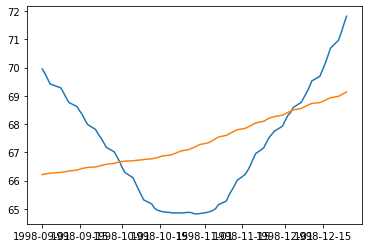

In [32]:
#Let's visualize then the Sep'24 Death Cross was hit

plt.plot(sma50.loc['1998-09-01 00:00:00': "1998-12-25 00:00:00" , "SPY"])
plt.plot(sma200.loc['1998-09-01 00:00:00': "1998-12-25 00:00:00" , "SPY"])


In [33]:
close_price.loc[close_price.index[8000], 'SPY']

589.0574340820312

In [44]:
'''Strategy Outline
Use moving averages (MA) to identify trends. For example:
Buy USD/SEK when the short-term MA (e.g., 20-day) crosses above the long-term MA (e.g., 50-day).
Sell USD/SEK when the short-term MA crosses below the long-term MA.
Include an ATR (Average True Range) filter to ensure you only trade during higher volatility periods.

Backtest over a 5-year horizon using daily price data.
Your First Task:
Get the Data: Pull USD/SEK daily historical data for the last 5 years. You can use sources like Yahoo Finance (yfinance), Bloomberg, or any API you prefer.
Clean the Data: Ensure timestamps are uniform, and handle missing data (interpolation or drop).
Plot the Data: Plot USD/SEK's daily close to understand trends and volatility over time.
Once you’ve got that, send me the code or results, and we’ll layer on the moving average strategy next. How does that sound?

#position sizes? 
Got it! Let’s go with volatility-adjusted sizing using ATR to determine position size. This way, you’re adjusting for market conditions and ensuring that during higher volatility (when ATR is larger), you’re taking smaller positions, and during low volatility, you're able to take larger positions. It’s a more adaptive approach that ensures consistent risk management across varying market environments.

Here’s how we could structure it:

Risk per trade: Let’s say we risk 1% of total equity per trade.
Position size: Position size = (Risk per trade) / (ATR * Stop-Loss distance in SEK).
This gives us a dynamic sizing model that adjusts depending on the volatility of the USD/SEK pair.

How does that sound to you?

'''
#The average volatility range for the Dollar Krona is 0.93% - trade in times where vol > 93% & SMA's cross. 

import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
import matplotlib
import yfinance as yf
import datetime

print(datetime.date.today())

#Environment-specifics
initial_aum = 600000000
risk_per_trade = 600000000 * 0.01
one_lot = 100000
margin = 2.00

#Dataframes & Data-to-use
    #Timeframe:
horizon = datetime.timedelta(365*5) #5-year horizon

    #Dataframe
USDSEK_df = yf.download("USDSEK=X", datetime.date.today()-horizon,datetime.date.today())
USDSEK_Close_Price = USDSEK_df['Close']

    #Moving Averages
sma20 = USDSEK_Close_Price.rolling(20).mean()      #blue
sma100 = USDSEK_Close_Price.rolling(100).mean()    #orange

    #Calculating our ATR
highs = []
lows = []
closes = []
ticker = "USDSEK=X"

for i in range(len(USDSEK_df)):
    highs.append(USDSEK_df["High"].loc[USDSEK_df['High'].index[i], "USDSEK=X"])
    lows.append(USDSEK_df["Low"].loc[USDSEK_df["Low"].index[i], "USDSEK=X"])
    closes.append(USDSEK_df["Low"].loc[USDSEK_df["Low"].index[i], "USDSEK=X"])
highs_series = pd.Series(highs)
highs_array = np.array(highs_series)
lows_series = pd.Series(lows)
lows_array = np.array(lows_series)
closes_series = pd.Series(closes)
closes_array = np.array(closes_series)
ATR = ta.ATR(highs_array, lows_array, closes_array, timeperiod = 14)
#ATR = 0.93

#Trading
PNLs = []
positions = {}
trade_book = []
entry = None

for i in range(len(USDSEK_Close_Price)):
    if i >= 50:
        if ATR[i] > 0.05:
            #print(ATR[i])
            if (sma20.loc[sma20.index[i-1], "USDSEK=X"] > sma100.loc[sma100.index[i-1], "USDSEK=X"]) and (sma20.loc[sma20.index[i], "USDSEK=X"] < sma100.loc[sma100.index[i], "USDSEK=X"]):
                # Convert USD to SEK
                USDtoSEK = risk_per_trade * USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]
                # Determine value of lots in SEK
                SEKtoLOT = one_lot * USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]
                # How many lots can we buy? 
                risk_played = USDtoSEK / SEKtoLOT
                positions[USDSEK_Close_Price.index[i]] = {
                    
                    "Order": "SELL",
                    "Price": USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], "USDSEK=X"],
                    "Order Size": risk_played,
                    "ATR": ATR[i]
                }
                
                # Calculate our PNLs
                if entry:
                    PNLs.append(USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker] / entry)
                    entry = USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]
                else:
                    entry = USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]
                
                
                
                pd.concat([pd.Series(USDSEK_Close_Price.index[i], 
                                     pd.Series(USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], 
                                                                      ticker]))], ignore_index = True)
                
                print(f"SELL @ {USDSEK_Close_Price.index[i]} {USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]}")
                print(SEKtoLOT)
                
            elif (sma20.loc[sma20.index[i-1], "USDSEK=X"] < sma100.loc[sma100.index[i-1], "USDSEK=X"]) and (sma20.loc[sma20.index[i], "USDSEK=X"] > sma100.loc[sma100.index[i], "USDSEK=X"]):

                USDtoSEK = risk_per_trade * USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]
                SEKtoLOT = one_lot * USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]
                risk_played = USDtoSEK / SEKtoLOT
                positions[USDSEK_Close_Price.index[i]] = {
                    
                    "Order": "BUY",
                    "Price": USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], "USDSEK=X"],
                    "Order Size": risk_played,
                    "ATR": ATR[i]
                }
                
                # Calculate our PNLs
                if entry:
                    PNLs.append(USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker] / entry)
                    entry = USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]
                else:
                    entry = USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]                

                
                
                
                pd.concat([pd.Series(USDSEK_Close_Price.index[i], 
                                     pd.Series(USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], 
                                                                      ticker]))], ignore_index = True)
                                
                
                
                
                
                
                
                
                
                
                
                
                
                
                print(f"BUY @ {USDSEK_Close_Price.index[i]} {USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]}")
                


[*********************100%***********************]  1 of 1 completed

2025-01-25


BUY @ 2021-03-19 00:00:00 8.506850242614746
SELL @ 2021-05-12 00:00:00 8.319330215454102
831933.0215454102
BUY @ 2021-07-05 00:00:00 8.546299934387207
SELL @ 2021-11-04 00:00:00 8.527739524841309
852773.9524841309
BUY @ 2021-11-22 00:00:00 8.956390380859375
SELL @ 2022-11-28 00:00:00 10.45557975769043
1045557.975769043
BUY @ 2023-03-15 00:00:00 10.468700408935547
SELL @ 2023-04-07 00:00:00 10.421119689941406
1042111.9689941406
BUY @ 2023-05-29 00:00:00 10.798800468444824
SELL @ 2023-08-01 00:00:00 10.521730422973633
1052173.0422973633
BUY @ 2023-08-15 00:00:00 10.799799919128418
SELL @ 2023-11-23 00:00:00 10.476099967956543
1047609.9967956543
BUY @ 2024-03-28 00:00:00 10.638039588928223
SELL @ 2024-06-13 00:00:00 10.377599716186523
1037759.9716186523
BUY @ 2024-08-05 00:00:00 10.557000160217285
SELL @ 2024-08-06 00:00:00 10.525870323181152
1052587.0323181152
BUY @ 2024-10-29 00:00:00 10.643349647521973


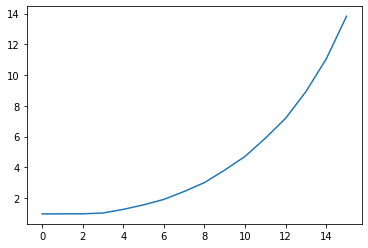

In [151]:
plt.plot(np.cumprod(np.array(PNLs)))

In [104]:
USDSEK_Close_Price.loc[USDSEK_Close_Price.index[1], ticker]

9.620599746704102

In [140]:
asss = [2, 4]

asss[1]

4

In [363]:
highs_series
idk = pd.Series(2909)
highs_series

pd.concat([highs_series, idk])

0          9.48515
1          9.49768
2          9.52353
3          9.53342
4          9.53722
           ...    
1298      11.10557
1299      11.20174
1300      11.18063
1301      11.24724
0       2909.00000
Length: 1303, dtype: float64

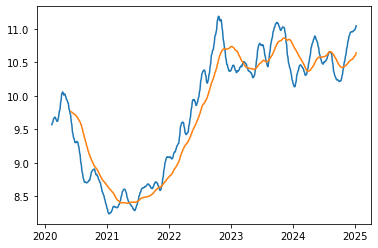

In [320]:
plt.plot(sma20)
plt.plot(sma100)

In [154]:
'''
Last updated: 1.26.2025
'''

import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
import matplotlib
import yfinance as yf
import datetime

#Environment-specifics
initial_aum = 600000000
risk_per_trade = 600000000 * 0.01
one_lot = 100000
margin = 2.00

#Dataframes; Data
    #Timeframe:
horizon = datetime.timedelta(365*5) #5-year horizon

    #Dataframe
USDSEK_df = yf.download("USDSEK=X", datetime.date.today()-horizon,datetime.date.today())
USDSEK_Close_Price = USDSEK_df['Close']

    #Moving Averages
sma20 = USDSEK_Close_Price.rolling(20).mean()      #blue
sma100 = USDSEK_Close_Price.rolling(100).mean()    #orange

    #Calculating our ATR
highs = []
lows = []
closes = []
ticker = "USDSEK=X"
ATR_multiple = 2.00
vol_adjustment = [.95, 1.05]


for i in range(len(USDSEK_df)):
    highs.append(USDSEK_df["High"].loc[USDSEK_df['High'].index[i], "USDSEK=X"])
    lows.append(USDSEK_df["Low"].loc[USDSEK_df["Low"].index[i], "USDSEK=X"])
    closes.append(USDSEK_df["Low"].loc[USDSEK_df["Low"].index[i], "USDSEK=X"])
highs_series = pd.Series(highs)
highs_array = np.array(highs_series)
lows_series = pd.Series(lows)
lows_array = np.array(lows_series)
closes_series = pd.Series(closes)
closes_array = np.array(closes_series)

ATR = ta.ATR(highs_array, lows_array, closes_array, timeperiod = 14)

#Trading
PNLs = []
positions = {}
trade_book = []
entry = None

for i in range(len(USDSEK_Close_Price)):
    if i >=14:
        #if ATR is bigger, at this moment, as the past 14 day ATR
        if ATR[i] > np.mean(ATR[i-14: i]):
            #trade smaller position due to larger vol
            if (sma20.loc[sma20.index[i-1], ticker] > sma100.loc[sma100.index[i-1], ticker]) and (sma20.loc[sma20.index[i], ticker] < sma100.loc[sma100.index[i], ticker]):
                #Calculate Pip Value
                pip_value = one_lot * 0.0001 * USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]
                
                #Adjust Position Size due to Vol
                position_size = risk_per_trade / ((pip_value * vol_adjustment[1])  * ATR[i])
                
                #Append to Positions Dictionary
                positions[USDSEK_Close_Price.index[i]] = {
                    "Order": "SELL",
                    "Price": USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker],
                    "Order Size": position_size,
                    "ATR": ATR[i]}
                
                #Calculate the Trade's PNL
                if entry:
                    PNLs.append(USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker] / entry)
                    entry = USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]
                else:
                    entry = USDSE_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]

            elif (sma20.loc[sma20.index[i-1], ticker] < sma100.loc[sma100.index[i-1], ticker]) and (sma20.loc[sma20.index[i], ticker] > sma100.loc[sma100.index[i], ticker]):
                pip_value = one_lot * 0.0001 * USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]
                position_size = risk_per_trade / ((pip_value * vol_adjustment[1])  * ATR[i])
                positions[USDSEK_Close_Price.index[i]] = {
                    "Order": "BUY",
                    "Price": USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker],
                    "Order Size": position_size,
                    "ATR": ATR[i]}                    
                if entry:
                    PNLs.append(USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker] / entry)
                    entry = USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]

                else:
                    entry = USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]
                    
        elif ATR[i] < np.mean(ATR[i-14:i]):
            if (sma20.loc[sma20.index[i-1], ticker] > sma100.loc[sma100.index[i-1], ticker]) and (sma20.loc[sma20.index[i], ticker] < sma100.loc[sma100.index[i], ticker]):
                pip_value = one_lot * 0.0001 * USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]
                position_size = risk_per_trade / ((pip_value * vol_adjustment[0])  * ATR[i])
                positions[USDSEK_Close_Price.index[i]] = {
                    "Order": "SELL",
                    "Price": USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker],
                    "Order Size": position_size,
                    "ATR": ATR[i]}                
                if entry:
                    PNLs.append(USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker] / entry)
                    entry = USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]                    
                else:
                    entry = USDSE_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]
                    
            elif (sma20.loc[sma20.index[i-1], ticker] < sma100.loc[sma100.index[i-1], ticker]) and (sma20.loc[sma20.index[i], ticker] > sma100.loc[sma100.index[i], ticker]):
                pip_value = one_lot * 0.0001 * USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]
                position_size = risk_per_trade / ((pip_value * vol_adjustment[0])  * ATR[i])
                positions[USDSEK_Close_Price.index[i]] = {
                    "Order": "BUY",
                    "Price": USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker],
                    "Order Size": position_size,
                    "ATR": ATR[i]}     
                if entry:
                    PNLs.append(USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker] / entry)
                    entry = USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]                    
                else:
                    entry = USDSEK_Close_Price.loc[USDSEK_Close_Price.index[i], ticker]
                    
#Profitability Analysis
print(np.cumprod(PNLs))

[*********************100%***********************]  1 of 1 completed


[0.97795659 1.0046374  1.00245558 1.05284449 1.22907768 1.23062004
 1.22502682 1.26942407 1.23685384 1.26954156 1.23148988 1.25052626
 1.21991094 1.24099988 1.2373405  1.25115047]


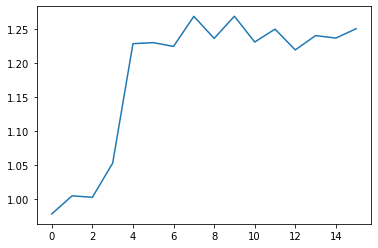

In [155]:
plt.plot(np.cumprod(np.array(PNLs)))